## Chougule_Pushkar_Milestone3
## Telecom Customer Churn
## Graphics Analysis
## Feature Reduction (Extraction/Selection)
## Filling in Missing Values
## Split-Train-Test
## Model creation and Evaluation

### The project I will be working on is to determine the chances of telecom company’s customer churn in a given month based on the features such as 

#### a)	Services signed up such as – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
#### b)	Customer account information – duration of customer relationship, contract, payment method, paperless billing, monthly charges, and total charges.
#### c)	Customer demographic info – gender, age range, and if they have partners or dependents

#### This will help the telecom company representatives to identify the potential customer churn and rollout any special offers to retain them. To conduct this analysis, I will be using a data set from Kaggle located at https://www.kaggle.com/blastchar/telco-customer-churn. This dataset is shared by “IBM Sample Data Sets”.

[Click here for milestone-2 code](#Milestone-2-Begins-here)

### Milestone 1 Code begins here

In [1]:
## Load required libraries
## installed yellowbrick library via "pip install yellowbrick" command prior to running

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick

### Step 1:  Load data into a dataframe

In [2]:
## Step 1:  Load data into a dataframe

addr1 = "./Telecom-Customer-Churn.csv"
data = pd.read_csv(addr1)

### Step 2:  check the dimension of the table

In [3]:
## Step 2:  check the dimension of the table

print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (7043, 21)


### Step 3:  Look at the data

In [4]:
#Step 3:  Look at the data

#print(data.head(5))
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 5:  what type of variables are in the table 

In [5]:
## Checking the types of data columns to check whether there is a need to convert any column types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## TotalCharges column should be a numeric column. So, converting the column type.

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#check the column types after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Step 5:  what type of variables are in the table 

print("Describe Data")
#print(data.describe())
data.describe()

Describe Data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
print("Summarized Data")
#print(data.describe(include=['O']))
data.describe(include=['O'])

Summarized Data


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3027-ZTDHO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Step 6: import visulization packages

In [9]:
## Step 6: import visulization packages

import matplotlib.pyplot as plt

In [10]:
## set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

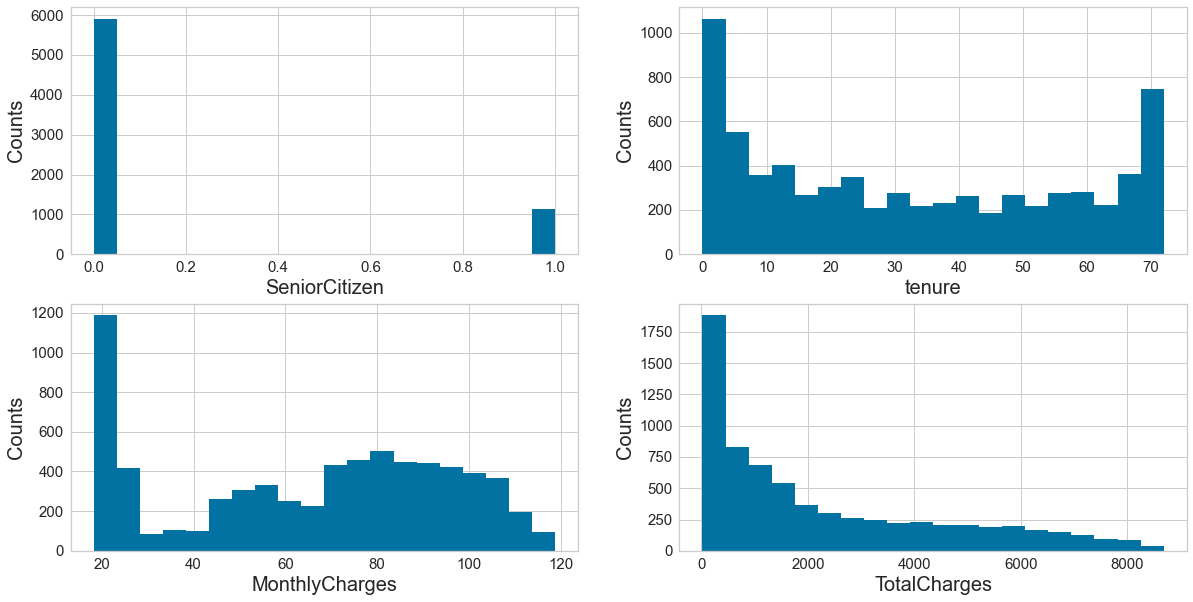

In [11]:
## make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

## Specify the features of interest

num_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

## draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

#plt.show()

#### 1) Histogram of SeniorCitizen variable shows majority of the customers are non SeniorCitizens
#### 2) Histogram of tenure variable shows majority of the customers are under 10 months and above 65-70 months
#### 3) Histogram of MonthlyCharges variable shows majority of the customers either below 30 dollars or between 70 - 90 dollars
#### 4) Histogram of TotalCharges variable shows majority of the customers are near the lower range of 0-2000 dollars (around 500 dollars)

### Step7:  Barcharts: set up the figure size

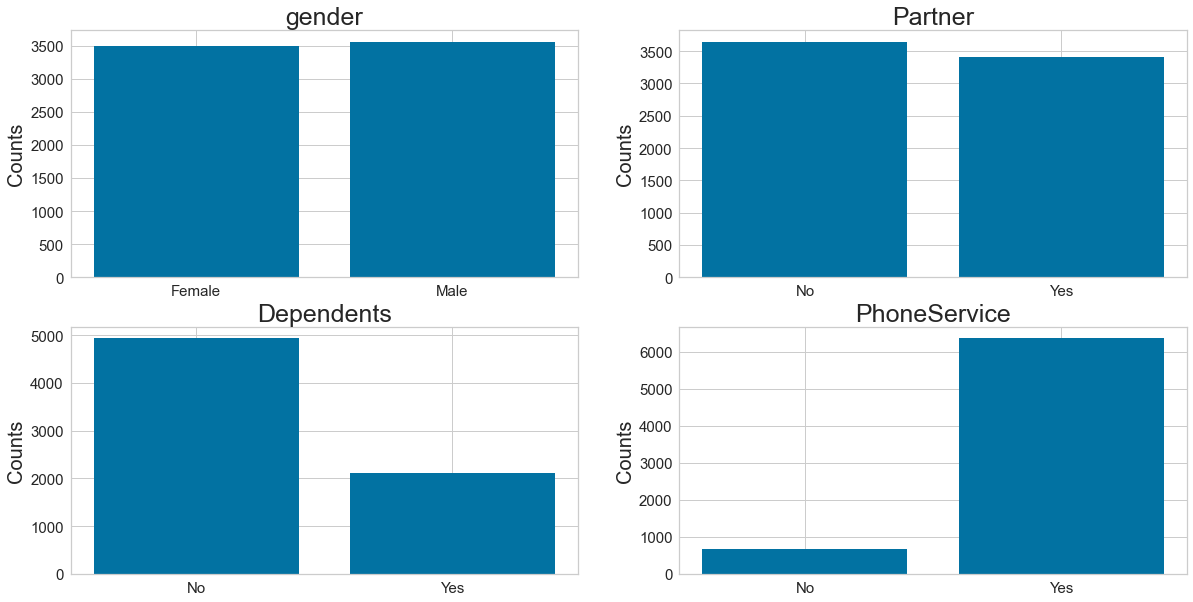

In [12]:
##Step7:  Barcharts: set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)


## make the data read to feed into the visulizer

#X_gender = data.replace({'gender': {1: 'Male', 0: 'Female'}}).groupby('gender').size().reset_index(name='Counts')['gender']
#Y_gender = data.replace({'gender': {1: 'Male', 0: 'Female'}}).groupby('gender').size().reset_index(name='Counts')['Counts']

X_gender = data.groupby('gender').size().reset_index(name='Counts')['gender']
Y_gender = data.groupby('gender').size().reset_index(name='Counts')['Counts']

## make the bar plot

axes[0, 0].bar(X_gender, Y_gender)
axes[0, 0].set_title('gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Partner = data.groupby('Partner').size().reset_index(name='Counts')['Partner']
Y_Partner = data.groupby('Partner').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Partner, Y_Partner)
axes[0, 1].set_title('Partner', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Dependents = data.groupby('Dependents').size().reset_index(name='Counts')['Dependents']
Y_Dependents = data.groupby('Dependents').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Dependents, Y_Dependents)
axes[1, 0].set_title('Dependents', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

## make the data read to feed into the visulizer
X_PhoneService = data.groupby('PhoneService').size().reset_index(name='Counts')['PhoneService']
Y_PhoneService = data.groupby('PhoneService').size().reset_index(name='Counts')['Counts']

## make the bar plot
axes[1, 1].bar(X_PhoneService, Y_PhoneService)
axes[1, 1].set_title('PhoneService', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

#### 1) Almost equal number of Male and Female customers
#### 2) More number of customers with no Partners than customers with Partners
#### 3) More number of customers with no Dependents than customers with Dependents
#### 4) More number of customers with PhoneService as compared to customers with No PhoneService

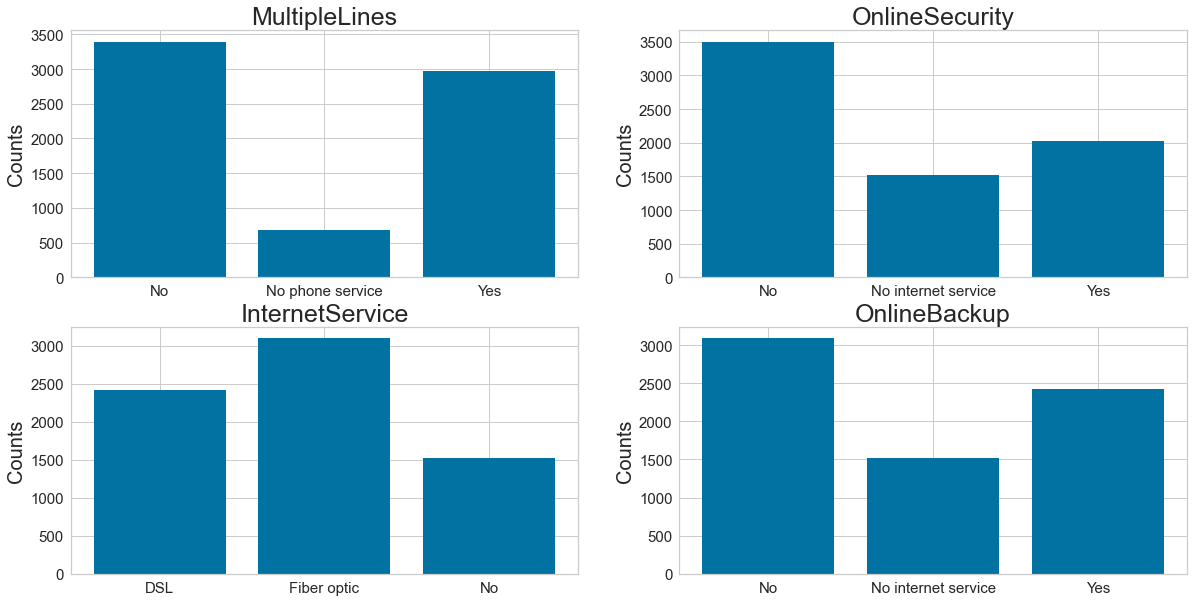

In [13]:
##Step7:  Barcharts: set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)


## make the data read to feed into the visulizer

#X_gender = data.replace({'gender': {1: 'Male', 0: 'Female'}}).groupby('gender').size().reset_index(name='Counts')['gender']
#Y_gender = data.replace({'gender': {1: 'Male', 0: 'Female'}}).groupby('gender').size().reset_index(name='Counts')['Counts']

X_MultipleLines = data.groupby('MultipleLines').size().reset_index(name='Counts')['MultipleLines']
Y_MultipleLines = data.groupby('MultipleLines').size().reset_index(name='Counts')['Counts']

## make the bar plot

axes[0, 0].bar(X_MultipleLines, Y_MultipleLines)
axes[0, 0].set_title('MultipleLines', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Internet = data.groupby('InternetService').size().reset_index(name='Counts')['InternetService']
Y_Internet = data.groupby('InternetService').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Internet, Y_Internet)
axes[1, 0].set_title('InternetService', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_OnlineSecurity = data.groupby('OnlineSecurity').size().reset_index(name='Counts')['OnlineSecurity']
Y_OnlineSecurity = data.groupby('OnlineSecurity').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_OnlineSecurity, Y_OnlineSecurity)
axes[0, 1].set_title('OnlineSecurity', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


## make the data read to feed into the visulizer
X_OnlineBackup = data.groupby('OnlineBackup').size().reset_index(name='Counts')['OnlineBackup']
Y_OnlineBackup = data.groupby('OnlineBackup').size().reset_index(name='Counts')['Counts']

## make the bar plot
axes[1, 1].bar(X_OnlineBackup, Y_OnlineBackup)
axes[1, 1].set_title('OnlineBackup', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

#### 1) More customers who do NOT have Multiple lines followed by those with Multiple lines and No Phone service customer at last
#### 2) More customers who do NOT have Online Security followed by those with Online Security and No internet service customer at last
#### 3) More number of customers with Fiber Optic connection followed by those with DSL connection and No InternetService customers at last
#### 4) More customers who do NOT have Online Backup followed by those with Online Backup and No internet service customer at last

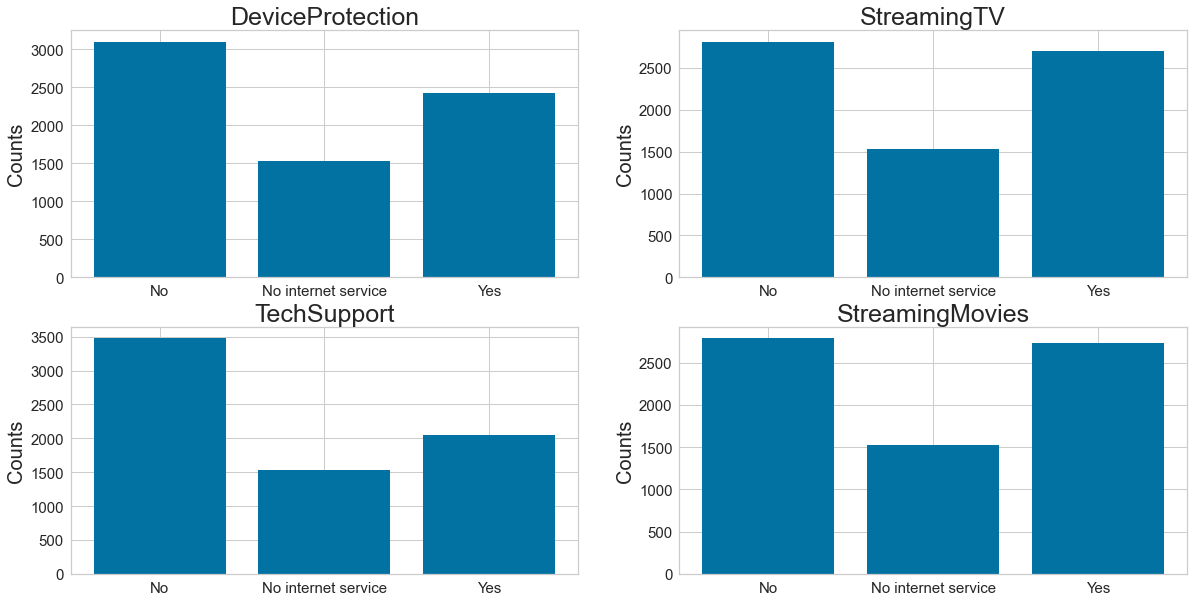

In [14]:
##Step7:  Barcharts: set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)


## make the data read to feed into the visulizer

X_DeviceProtection = data.groupby('DeviceProtection').size().reset_index(name='Counts')['DeviceProtection']
Y_DeviceProtection = data.groupby('DeviceProtection').size().reset_index(name='Counts')['Counts']

## make the bar plot

axes[0, 0].bar(X_DeviceProtection, Y_DeviceProtection)
axes[0, 0].set_title('DeviceProtection', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_TechSupport = data.groupby('TechSupport').size().reset_index(name='Counts')['TechSupport']
Y_TechSupport = data.groupby('TechSupport').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_TechSupport, Y_TechSupport)
axes[1, 0].set_title('TechSupport', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_StreamingTV = data.groupby('StreamingTV').size().reset_index(name='Counts')['StreamingTV']
Y_StreamingTV = data.groupby('StreamingTV').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_StreamingTV, Y_StreamingTV)
axes[0, 1].set_title('StreamingTV', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


## make the data read to feed into the visulizer
X_StreamingMovies = data.groupby('StreamingMovies').size().reset_index(name='Counts')['StreamingMovies']
Y_StreamingMovies = data.groupby('StreamingMovies').size().reset_index(name='Counts')['Counts']

## make the bar plot
axes[1, 1].bar(X_StreamingMovies, Y_StreamingMovies)
axes[1, 1].set_title('StreamingMovies', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

#### 1) More customers who do NOT have Device Protection followed by those with Device Protection and No internet service customer at last
#### 2) More customers who do NOT have Streaming TV followed by those with Streaming TV and No internet service customer at last
#### 3) More number of customers with Tech Support followed by those with Tech Support and No InternetService customers at last
#### 4) More customers who do NOT have Streaming Movies followed by those with Streaming Movies and No internet service customer at last

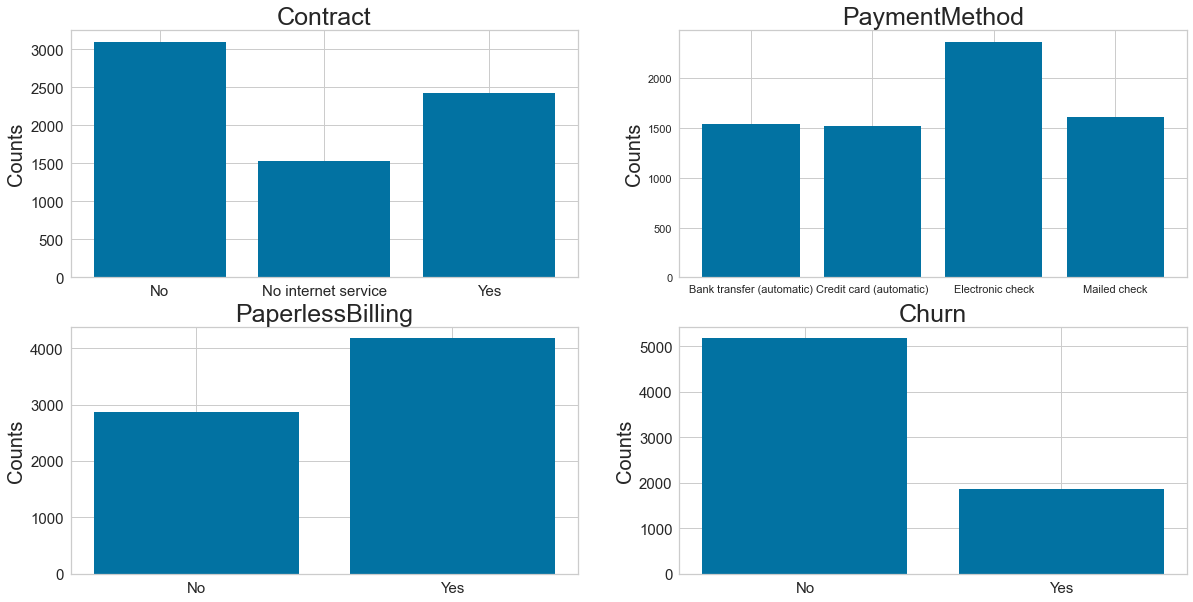

In [15]:
##Step7:  Barcharts: set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)


## make the data read to feed into the visulizer

X_Contract = data.groupby('Contract').size().reset_index(name='Counts')['Contract']
Y_Contract = data.groupby('Contract').size().reset_index(name='Counts')['Counts']

## make the bar plot

axes[0, 0].bar(X_DeviceProtection, Y_DeviceProtection)
axes[0, 0].set_title('Contract', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_PaperlessBilling = data.groupby('PaperlessBilling').size().reset_index(name='Counts')['PaperlessBilling']
Y_PaperlessBilling = data.groupby('PaperlessBilling').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_PaperlessBilling, Y_PaperlessBilling)
axes[1, 0].set_title('PaperlessBilling', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_PaymentMethod = data.groupby('PaymentMethod').size().reset_index(name='Counts')['PaymentMethod']
Y_PaymentMethod = data.groupby('PaymentMethod').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_PaymentMethod, Y_PaymentMethod)
axes[0, 1].set_title('PaymentMethod', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=11)


## make the data read to feed into the visulizer
X_Churn = data.groupby('Churn').size().reset_index(name='Counts')['Churn']
Y_Churn = data.groupby('Churn').size().reset_index(name='Counts')['Counts']

## make the bar plot
axes[1, 1].bar(X_Churn, Y_Churn)
axes[1, 1].set_title('Churn', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

#### 1) As we can see, number of Customers Churning is less than number of people who did not Churn
#### 2) number of Customers with Paperless billings is more than number of people who did not have Paperless Billing
#### 3) More number of customers who are NOT under the Contract followed by Customers with Contract
#### 4) More number of customers with Electronic check followed by people using Mailed Check for the payments then payment methods of by Bank Transfer and Credit Card appear

### Step 8: Pearson Ranking

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

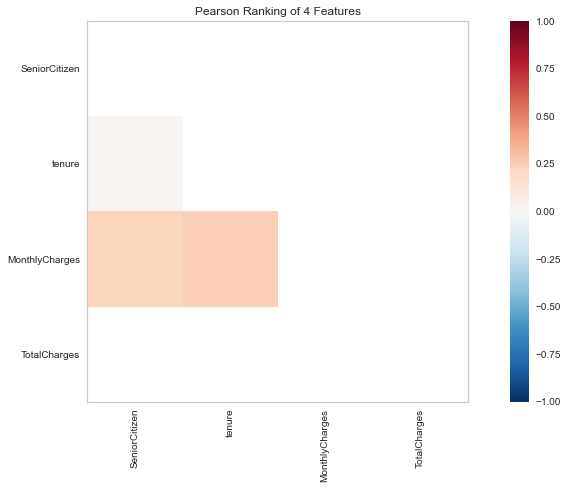

In [16]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 7)

## import the package for visulization of the correlation

from yellowbrick.features import Rank2D


## extract the numpy arrays from the data frame

##X = data[num_features].as_matrix() - as_matrix() method is no longer supported and we need to use to_numpy to make it work


X = data[num_features].to_numpy()                ## reference: https://github.com/marcotcr/lime/issues/517


# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                             # Fit the data to the visualizer
visualizer.transform(X)                       # Transform the data
visualizer.poof(outpath="pcoords1.png")       # Draw/show/poof the data
#plt.show()

#### There appears to be higher correlation between tenure and Monthly charges variables. This is followed by correlation between Senior Citizens and Monthly charges and finally the correlation between Senior Citizens and tenure.

### Step 9:  Compare variables against Churn and No Churn

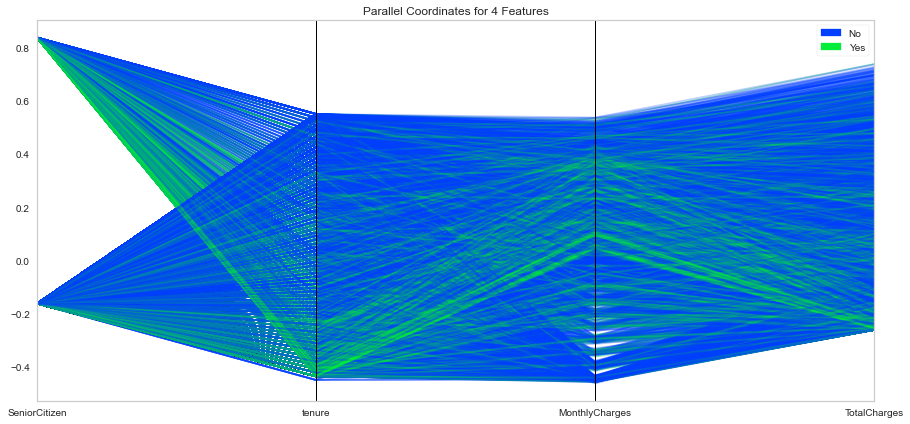

In [17]:
## Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['No', 'Yes']
num_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))


X = data_norm[num_features].to_numpy()
y = data.Churn.to_numpy()


# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)                        # Fit the data to the visualizer
visualizer.transform(X)                     # Transform the data
#visualizer.poof(outpath="./pcoords2.png")  # Draw/show/poof the data
visualizer.poof()  # Draw/show/poof the data
plt.show()

#### Parallel Coordinates plot - representing variables 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges' on each of the columns on x-axis at values 0.0, 1.0, 2.0 and 3.0 respectively - the labels are displayed on the plot using visualizer.poof().

### Step 10 - stacked bar charts to compare churn/no churn

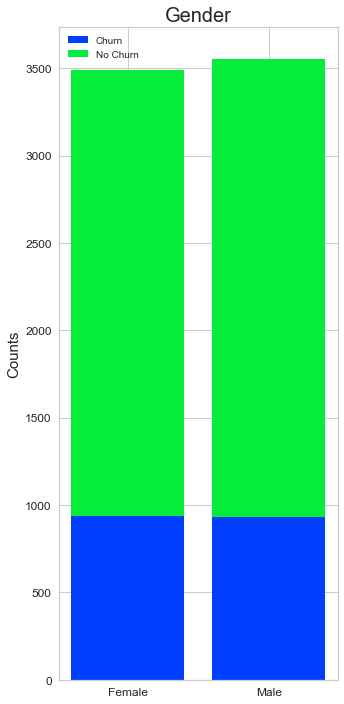

In [18]:
## Step 10 - stacked bar charts to compare churn/no churn against gender column values
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 12)

# make subplots
#fig, axes = plt.subplots(nrows = 2, ncols = 2)

gender_churn = data[data.Churn=='Yes']['gender'].value_counts()
gender_no_churn = data[data.Churn=='No']['gender'].value_counts()
gender_no_churn = gender_no_churn.reindex(index = gender_churn.index)

# make the bar plot
p1 = plt.bar(gender_churn.index, gender_churn.values)
p2 = plt.bar(gender_no_churn.index, gender_no_churn.values, bottom=gender_churn.values)
plt.title('Gender', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)
plt.show()

#### Slightly higher percentage of Female customers tend to churn more as compared Male customers

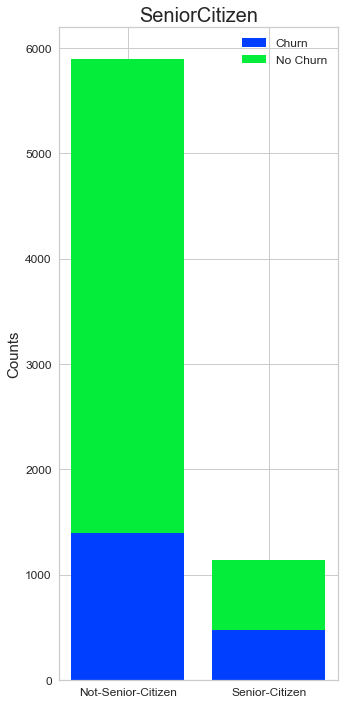

In [19]:
## Step 10 - stacked bar charts to compare churn/no churn against SeniorCitizen column values
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 12)

# make subplots
#fig, axes = plt.subplots(nrows = 2, ncols = 2)

sc_churn = data.replace({'SeniorCitizen': {1: 'Senior-Citizen', 0: 'Not-Senior-Citizen'}})[data['Churn']=='Yes']['SeniorCitizen'].value_counts()
sc_no_churn = data.replace({'SeniorCitizen': {1: 'Senior-Citizen', 0: 'Not-Senior-Citizen'}})[data['Churn']=='No']['SeniorCitizen'].value_counts()
sc_no_churn = sc_no_churn.reindex(index = sc_churn.index)

# make the bar plot
p1 = plt.bar(sc_churn.index, sc_churn.values)
p2 = plt.bar(sc_no_churn.index, sc_no_churn.values, bottom=sc_churn.values)
plt.title('SeniorCitizen', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 12)
plt.show()

#### Higher percentage of Non Senior Citizen customers tend to churn more as compared to Senior Citizen customers

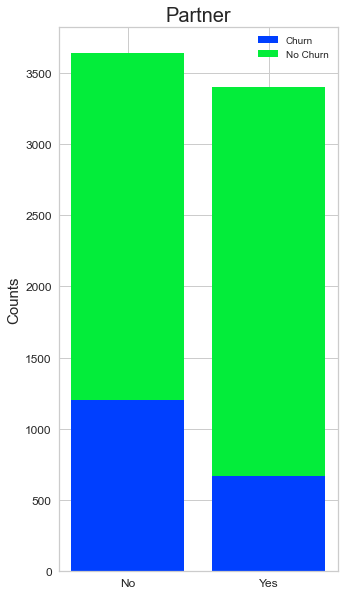

In [20]:
## Step 10 - stacked bar charts to compare churn/no churn against Partner
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 10)

# make subplots
#fig, axes = plt.subplots(nrows = 2, ncols = 2)

Partner_churn = data[data.Churn=='Yes']['Partner'].value_counts()
Partner_no_churn = data[data.Churn=='No']['Partner'].value_counts()
Partner_no_churn = Partner_no_churn.reindex(index = Partner_churn.index)

# make the bar plot
p1 = plt.bar(Partner_churn.index, Partner_churn.values)
p2 = plt.bar(Partner_no_churn.index, Partner_no_churn.values, bottom=Partner_churn.values)
plt.title('Partner', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)
plt.show()

#### Higher percentage of customers Not having Partner tend to churn more

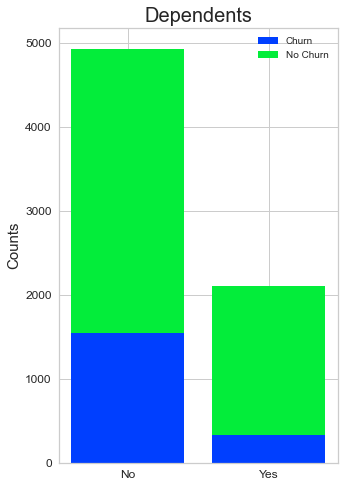

In [21]:
## Step 10 - stacked bar charts to compare churn/no churn against Dependents
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 8)

Dependents_churn = data[data.Churn=='Yes']['Dependents'].value_counts()
Dependents_no_churn = data[data.Churn=='No']['Dependents'].value_counts()
Dependents_no_churn = Dependents_no_churn.reindex(index = Dependents_churn.index)

# make the bar plot
p1 = plt.bar(Dependents_churn.index, Dependents_churn.values)
p2 = plt.bar(Dependents_no_churn.index, Dependents_no_churn.values, bottom=Dependents_churn.values)
plt.title('Dependents', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)
plt.show()

#### Higher percentage of customers with No dependents tend to churn more

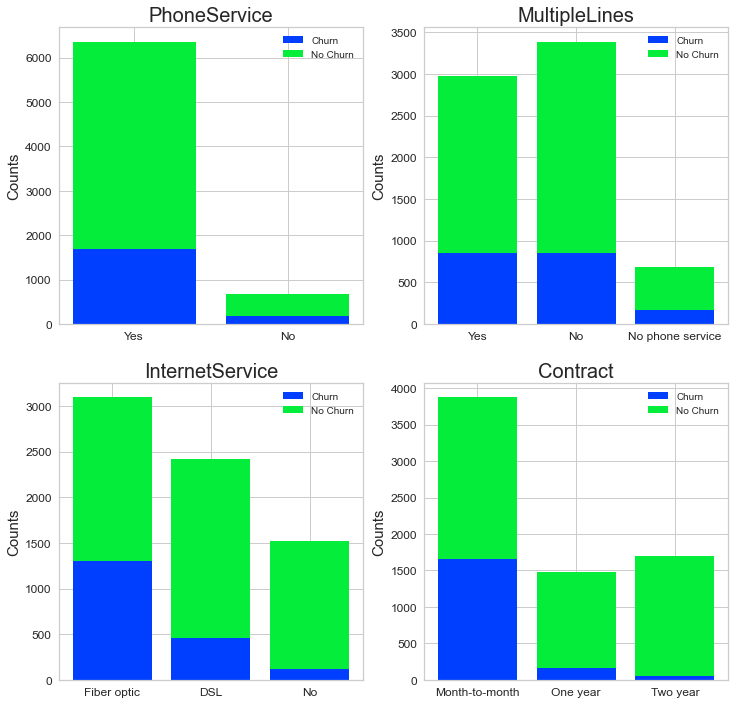

In [22]:
## Step 10 - stacked bar charts to compare churn/no churn against PhoneService
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

PhoneService_churn = data[data.Churn=='Yes']['PhoneService'].value_counts()
PhoneService_no_churn = data[data.Churn=='No']['PhoneService'].value_counts()
PhoneService_no_churn = PhoneService_no_churn.reindex(index = PhoneService_churn.index)

# make the bar plot
p1 = axes[0, 0].bar(PhoneService_churn.index, PhoneService_churn.values)
p2 = axes[0, 0].bar(PhoneService_no_churn.index, PhoneService_no_churn.values, bottom=PhoneService_churn.values)
axes[0, 0].set_title('PhoneService', fontsize=20)
axes[0, 0].set_ylabel('Counts', fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)


MultipleLines_churn = data[data.Churn=='Yes']['MultipleLines'].value_counts()
MultipleLines_no_churn = data[data.Churn=='No']['MultipleLines'].value_counts()
MultipleLines_no_churn = MultipleLines_no_churn.reindex(index = MultipleLines_churn.index)

# make the bar plot
p3 = axes[0, 1].bar(MultipleLines_churn.index, MultipleLines_churn.values)
p4 = axes[0, 1].bar(MultipleLines_no_churn.index, MultipleLines_no_churn.values, bottom=MultipleLines_churn.values)
axes[0, 1].set_title('MultipleLines', fontsize=20)
axes[0, 1].set_ylabel('Counts', fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend((p3[0], p4[0]), ('Churn', 'No Churn'), fontsize = 10)


InternetService_churn = data[data.Churn=='Yes']['InternetService'].value_counts()
InternetService_no_churn = data[data.Churn=='No']['InternetService'].value_counts()
InternetService_no_churn = InternetService_no_churn.reindex(index = InternetService_churn.index)

# make the bar plot
p5 = axes[1, 0].bar(InternetService_churn.index, InternetService_churn.values)
p6 = axes[1, 0].bar(InternetService_no_churn.index, InternetService_no_churn.values, bottom=InternetService_churn.values)
axes[1, 0].set_title('InternetService', fontsize=20)
axes[1, 0].set_ylabel('Counts', fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend((p5[0], p6[0]), ('Churn', 'No Churn'), fontsize = 10)


Contract_churn = data[data.Churn=='Yes']['Contract'].value_counts()
Contract_no_churn = data[data.Churn=='No']['Contract'].value_counts()
Contract_no_churn = Contract_no_churn.reindex(index = Contract_churn.index)

# make the bar plot
p7 = axes[1, 1].bar(Contract_churn.index, Contract_churn.values)
p8 = axes[1, 1].bar(Contract_no_churn.index, Contract_no_churn.values, bottom=Contract_churn.values)
axes[1, 1].set_title('Contract', fontsize=20)
axes[1, 1].set_ylabel('Counts', fontsize=15)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend((p7[0], p8[0]), ('Churn', 'No Churn'), fontsize = 10)

#plt.show()

#### It appears higher percentage of customers having Phone Services Churn more than customers having Phone Services
#### Higher percentage of having Multiple Lines Churn more than customers not having Multiple Lines
#### Higher ratio of customers having Fiber Optic Internet Service tend to churn more as compared to customers with DSL and no internet service
#### Higher ratio of customers on Month-to-Month contract churn more as compared to customers on One year contract and the least amount of customers under tow year contract churn.

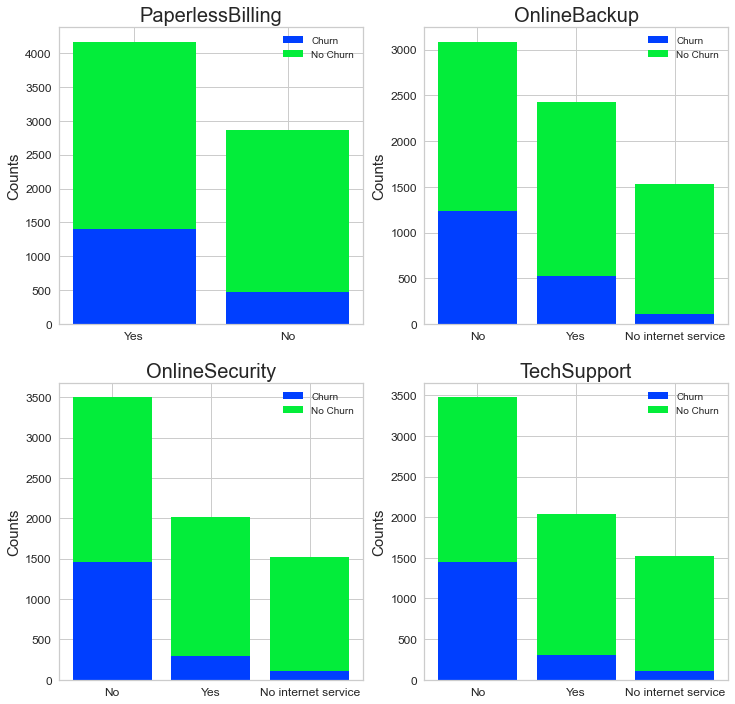

In [23]:
## Step 10 - stacked bar charts to compare churn/no churn against PhoneService
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

PaperlessBilling_churn = data[data.Churn=='Yes']['PaperlessBilling'].value_counts()
PaperlessBilling_no_churn = data[data.Churn=='No']['PaperlessBilling'].value_counts()
PaperlessBilling_no_churn = PaperlessBilling_no_churn.reindex(index = PaperlessBilling_churn.index)

# make the bar plot
p1 = axes[0, 0].bar(PaperlessBilling_churn.index, PaperlessBilling_churn.values)
p2 = axes[0, 0].bar(PaperlessBilling_no_churn.index, PaperlessBilling_no_churn.values, bottom=PaperlessBilling_churn.values)
axes[0, 0].set_title('PaperlessBilling', fontsize=20)
axes[0, 0].set_ylabel('Counts', fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)


OnlineBackup_churn = data[data.Churn=='Yes']['OnlineBackup'].value_counts()
OnlineBackup_no_churn = data[data.Churn=='No']['OnlineBackup'].value_counts()
OnlineBackup_no_churn = OnlineBackup_no_churn.reindex(index = OnlineBackup_churn.index)

# make the bar plot
p3 = axes[0, 1].bar(OnlineBackup_churn.index, OnlineBackup_churn.values)
p4 = axes[0, 1].bar(OnlineBackup_no_churn.index, OnlineBackup_no_churn.values, bottom=OnlineBackup_churn.values)
axes[0, 1].set_title('OnlineBackup', fontsize=20)
axes[0, 1].set_ylabel('Counts', fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend((p3[0], p4[0]), ('Churn', 'No Churn'), fontsize = 10)


OnlineSecurity_churn = data[data.Churn=='Yes']['OnlineSecurity'].value_counts()
OnlineSecurity_no_churn = data[data.Churn=='No']['OnlineSecurity'].value_counts()
OnlineSecurity_no_churn = OnlineSecurity_no_churn.reindex(index = OnlineSecurity_churn.index)

# make the bar plot
p5 = axes[1, 0].bar(OnlineSecurity_churn.index, OnlineSecurity_churn.values)
p6 = axes[1, 0].bar(OnlineSecurity_no_churn.index, OnlineSecurity_no_churn.values, bottom=OnlineSecurity_churn.values)
axes[1, 0].set_title('OnlineSecurity', fontsize=20)
axes[1, 0].set_ylabel('Counts', fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend((p5[0], p6[0]), ('Churn', 'No Churn'), fontsize = 10)


TechSupport_churn = data[data.Churn=='Yes']['TechSupport'].value_counts()
TechSupport_no_churn = data[data.Churn=='No']['TechSupport'].value_counts()
TechSupport_no_churn = TechSupport_no_churn.reindex(index = TechSupport_churn.index)

# make the bar plot
p7 = axes[1, 1].bar(TechSupport_churn.index, TechSupport_churn.values)
p8 = axes[1, 1].bar(TechSupport_no_churn.index, TechSupport_no_churn.values, bottom=TechSupport_churn.values)
axes[1, 1].set_title('TechSupport', fontsize=20)
axes[1, 1].set_ylabel('Counts', fontsize=15)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend((p7[0], p8[0]), ('Churn', 'No Churn'), fontsize = 10)

#plt.show()

#### Customers with Paperless Billing tend to churn more as compared with Paper Billing customers
#### Customers Not using Online Backup services tend to churn more as compared to others using Online Backup / No internet services
#### Customers Not using Online Security services tend to churn more as compared to others using Online Security / No internet services
#### Customers Not using Tech Support services tend to churn more as compared to others using Tech Support / No internet services

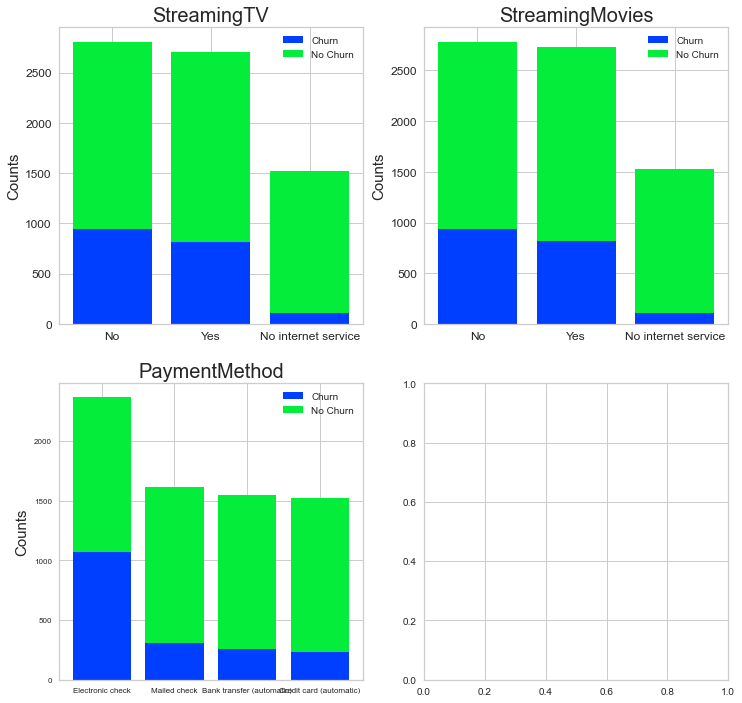

In [24]:
## Step 10 - stacked bar charts to compare churn/no churn against PhoneService
#set up the figure size
#%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

StreamingTV_churn = data[data.Churn=='Yes']['StreamingTV'].value_counts()
StreamingTV_no_churn = data[data.Churn=='No']['StreamingTV'].value_counts()
StreamingTV_no_churn = StreamingTV_no_churn.reindex(index = StreamingTV_churn.index)

# make the bar plot
p1 = axes[0, 0].bar(StreamingTV_churn.index, StreamingTV_churn.values)
p2 = axes[0, 0].bar(StreamingTV_no_churn.index, StreamingTV_no_churn.values, bottom=StreamingTV_churn.values)
axes[0, 0].set_title('StreamingTV', fontsize=20)
axes[0, 0].set_ylabel('Counts', fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 10)


StreamingMovies_churn = data[data.Churn=='Yes']['StreamingMovies'].value_counts()
StreamingMovies_no_churn = data[data.Churn=='No']['StreamingMovies'].value_counts()
StreamingMovies_no_churn = StreamingMovies_no_churn.reindex(index = StreamingMovies_churn.index)

# make the bar plot
p3 = axes[0, 1].bar(StreamingMovies_churn.index, StreamingMovies_churn.values)
p4 = axes[0, 1].bar(StreamingMovies_no_churn.index, StreamingMovies_no_churn.values, bottom=StreamingMovies_churn.values)
axes[0, 1].set_title('StreamingMovies', fontsize=20)
axes[0, 1].set_ylabel('Counts', fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend((p3[0], p4[0]), ('Churn', 'No Churn'), fontsize = 10)


PaymentMethod_churn = data[data.Churn=='Yes']['PaymentMethod'].value_counts()
PaymentMethod_no_churn = data[data.Churn=='No']['PaymentMethod'].value_counts()
PaymentMethod_no_churn = PaymentMethod_no_churn.reindex(index = PaymentMethod_churn.index)

# make the bar plot
p5 = axes[1, 0].bar(PaymentMethod_churn.index, PaymentMethod_churn.values)
p6 = axes[1, 0].bar(PaymentMethod_no_churn.index, PaymentMethod_no_churn.values, bottom=PaymentMethod_churn.values)
axes[1, 0].set_title('PaymentMethod', fontsize=20)
axes[1, 0].set_ylabel('Counts', fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=8)
axes[1, 0].legend((p5[0], p6[0]), ('Churn', 'No Churn'), fontsize = 10)

#plt.show()

#### Customers Not using StreamingTV services tend to churn more as compared to others using StreamingTV / No internet services
#### Customers Not using Streaming Movies services tend to churn more as compared to others using Streaming Movies / No internet services
#### Customers on Electronic Check payment method tend to churn more as compared to others using Mailed Check / Bank Transfer / Credit Card payment methods

# Milestone-2-Begins-here

### Step 11 - fill in missing values and eliminate features

In [25]:
## Look at the various columns and check if any NaN / missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
## Looking at above, TotalCharges column has NaN values

data[data.TotalCharges.isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Looking at above, we can see that TotalCharges column has NaN values for the customers having tenure as 0. TotalCharges column is the total of all the historical monthly billing amounts for the customer. We will fill it in with 0 amount for the new customers, who have tenure as 0 months

### Step 11 - fill in missing values and eliminate features

In [27]:
# Step 11 - fill in missing values and eliminate features
#fill the missing TotalCharges data with 0 value

def fill_na_median(data, inplace=True):
    return data.fillna(0, inplace=inplace)

fill_na_median(data['TotalCharges'])

# check the result
print(data['TotalCharges'].describe())

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


In [28]:
## Ensure that TotalCharges column has no NaN values remaining

data[data.TotalCharges.isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Now, none of the rows have TotalCharges values as NaN.

### Step 12 - convert categorical data to numbers

### customerID field is not useful to determine any impacts as it does not have any logical relation with Customer Churn. So, not using it for next steps.

### Looking at the visual analysis, gender category has almost similar percentages / ratio amongst the customer Churn / No Churn cases. So, it may not be very helpful for next steps.

### SeniorCitizen column essentially consists of 1 / 0 values and appears to be categorical in nature. Also, the heatmap indicates that there is no numeric values relation of this variable with Churn / No Churn categories. So, including this variable as Categorical feature below

### TotalCharges column appears to be related to tenure column i.e. higher the tenure, more amounts are reflected in TotalCharges column, looking at the data. So, we will exlcude TotalCharges column as redundant one.

### From the visual analysis, Rest all categorical columns / values within them, appear to show some relation with Churn / No Churn. So, I will be using them in as input features.

## Below are the next steps using features selected

In [29]:
#Step 12 - convert categorical data to numbers / dummy variables
#get the categorical data
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'PaperlessBilling', 'Contract']
data_cat = data[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
print(data_cat_dummies.head(10))

   SeniorCitizen  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0              0           0            1              1               0   
1              0           1            0              1               0   
2              0           1            0              1               0   
3              0           1            0              1               0   
4              0           1            0              1               0   
5              0           1            0              1               0   
6              0           1            0              0               1   
7              0           1            0              1               0   
8              0           0            1              1               0   
9              0           1            0              0               1   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1           

In [30]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['tenure', 'MonthlyCharges']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting

data_model_y = data.replace({'Churn': {'Yes': 1, 'No': 0}})['Churn']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
#####X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=18, 20)
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=20)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of No-Churn and Churn in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of No-Churn and Churn in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  5282
No. of samples in validation set: 1761


No. of No-Churn and Churn in the training set:
0    3861
1    1421
Name: Churn, dtype: int64


No. of No-Churn and Churn in the validation set:
0    1313
1     448
Name: Churn, dtype: int64


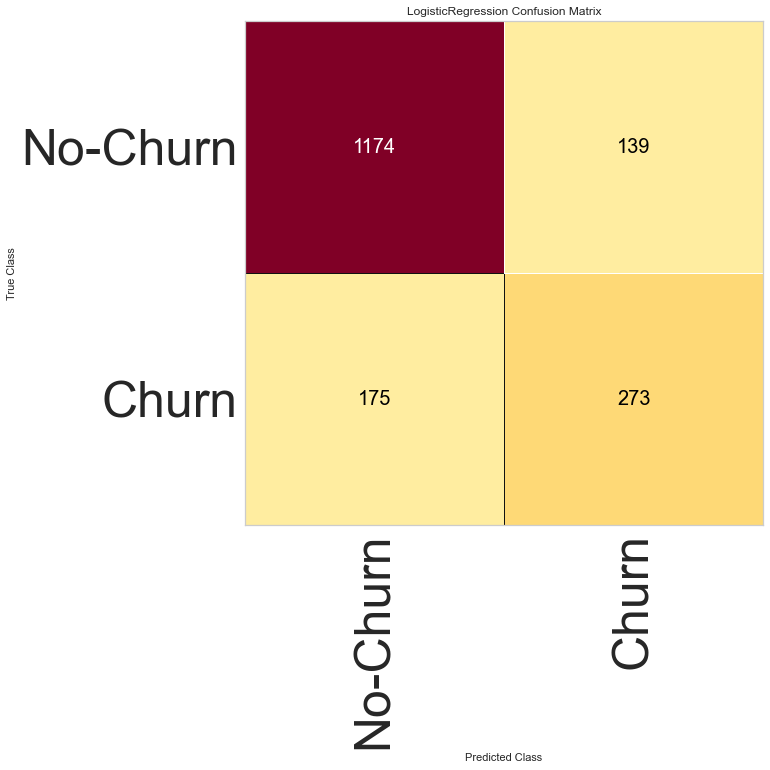

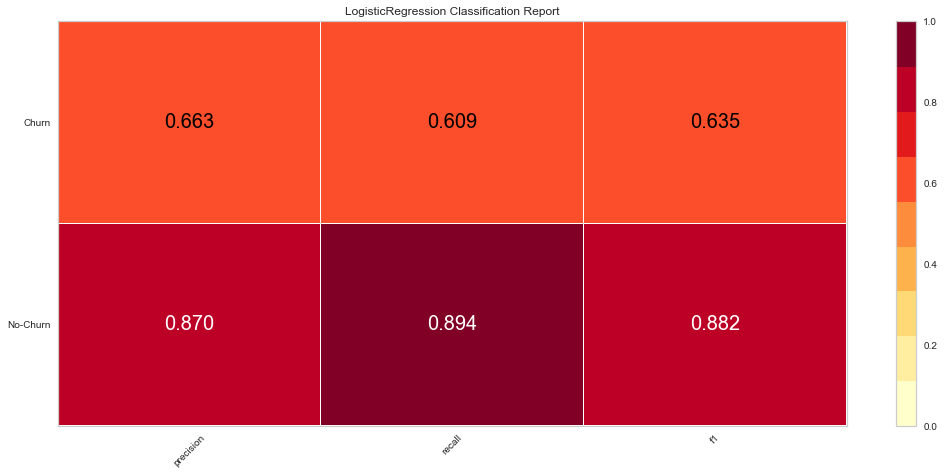

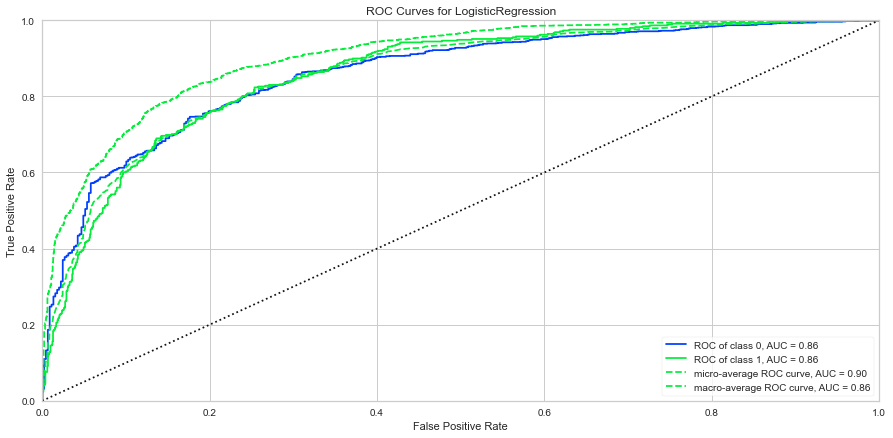

In [31]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
##model = LogisticRegression()
model = LogisticRegression(penalty='l1', solver='liblinear')   ## added parameters to supress warning - ConvergenceWarning

#The ConfusionMatrix visualizer taxes a model
classes = ['No-Churn', 'Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

#### I am using Logistic Model for the solution of this problem, since the final outcome needs Binary classification as customers who Churn and customers who do Not Churn.

#### Looking at above results from Confusion Matrix, The Logistic Model created appears to be relatively better at predicting the No-Churn customers as compared to customers who may Churn on the parameters like Precision, Recall and f1 scores.

#### I have tried out several combinations of Test data set zie (0.2, 0.3 and 0.25) and the random_state parameter (from 0 thru 20) and settled with values as 0.25 and 20 respectively for test_size and random_state.

#### In the upcoming Milestone, I will be looking to explore any additional model which can help improve the results and prediction scores for Churn portion of the customers, while keeping No-Churn predictions at similar or higher accuracy levels.